SVM for Expected Inner product kernel and standard SVM

A= Mean (0,0), Var (1,1)
B= Mean (1,1), Var (1,1)

Matplotlib is building the font cache; this may take a moment.


Accuracy of Standard SVM: 0.65
Accuracy of Expected Kernel SVM: 0.70


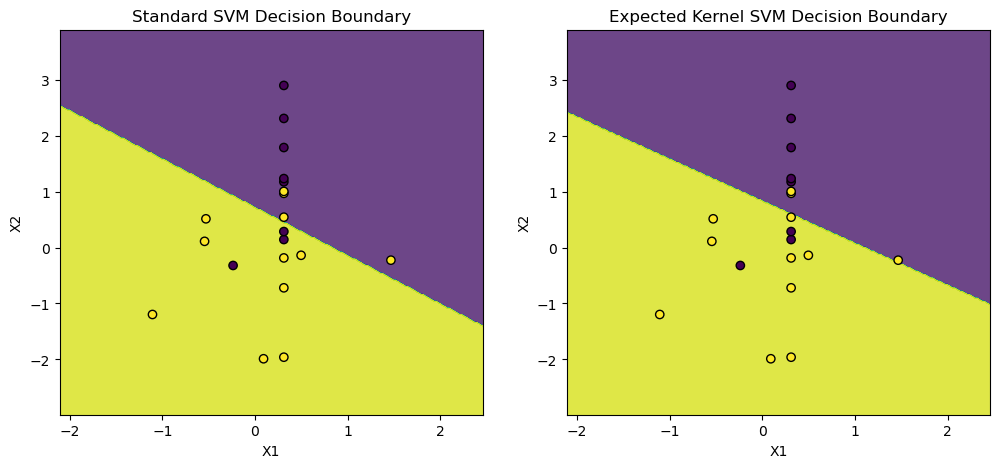

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Random seed for reproducibility
np.random.seed(42)

# Generating class +1 (A) and class -1 (B)
A = np.random.randn(50, 2)  # Mean (0,0), Var (1,1)
B = np.random.randn(50, 2) + np.array([1, 1])  # Mean (1,1), Var (1,1)

# Combining datasets (C = A U B)
X = np.vstack((A, B))
y = np.hstack((np.ones(50), -1 * np.ones(50)))  # Labels: A = +1, B = -1

# Introducing missing features: 
# Randomly remove 1st dimension for 50% of the data
missing_mask = np.random.rand(X.shape[0]) < 0.5
X_missing = X.copy()
X_missing[missing_mask, 0] = np.nan  # Setting 1st dimension to NaN for 50% of data

# Mean imputation for missing values
X_imputed = np.where(np.isnan(X_missing), np.nanmean(X_missing, axis=0), X_missing)

# Expected Inner Product Kernel
def expected_inner_product_kernel(X):
    kernel_matrix = X @ X.T  # Standard inner product (Equation 2 in the paper)
    covariance_per_sample = np.nanvar(X, axis=1, keepdims=True)  # Variance per sample
    kernel_matrix += np.diag(covariance_per_sample.flatten() * 10)  # Correction term for missing features
    return kernel_matrix

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Standard SVM
svm_standard = SVC(kernel='linear')
svm_standard.fit(X_train, y_train)
y_pred_standard = svm_standard.predict(X_test)
acc_standard = accuracy_score(y_test, y_pred_standard)

# SVM with Expected Inner Product Kernel
K_train = expected_inner_product_kernel(X_train)  # Kernel matrix for training data
K_test = X_test @ X_train.T  # Kernel matrix for test data

svm_expected = SVC(kernel='precomputed')
svm_expected.fit(K_train, y_train)

y_pred_expected = svm_expected.predict(K_test)
acc_expected = accuracy_score(y_test, y_pred_expected)

# Results
print(f"Accuracy of Standard SVM: {acc_standard:.2f}")
print(f"Accuracy of Expected Kernel SVM: {acc_expected:.2f}")

# To plot decision boundaries for standard SVM
def plot_decision_boundary_standard(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')

# To plot decision boundaries for expected kernel SVM
def plot_decision_boundary_expected(clf, X_train, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    
   
    K_mesh = mesh_points @ X_train.T  # Kernel matrix for mesh points
    Z = clf.predict(K_mesh)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')

plt.figure(figsize=(12, 5))

# Standard SVM
plt.subplot(1, 2, 1)
plot_decision_boundary_standard(svm_standard, X_test, y_test, "Standard SVM Decision Boundary")

# Expected Kernel SVM
plt.subplot(1, 2, 2)
plot_decision_boundary_expected(svm_expected, X_train, X_test, y_test, "Expected Kernel SVM Decision Boundary")

plt.show()

A= Mean (0,0), Var (1,1)
B= Mean (1,0), Var (1,1)

Accuracy of Standard SVM: 0.55
Accuracy of Expected Kernel SVM: 0.60


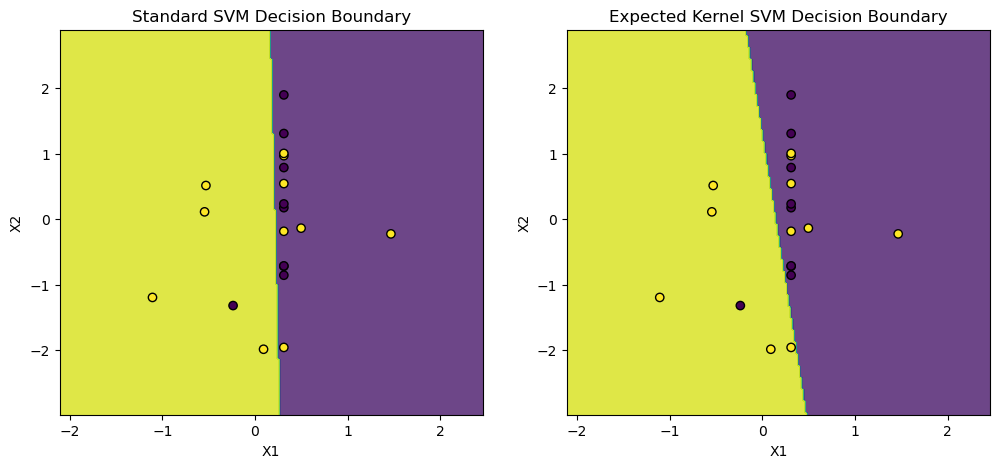

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Random seed for reproducibility
np.random.seed(42)

# Generating class +1 (A) and class -1 (B)
A = np.random.randn(50, 2)  # Mean (0,0), Var (1,1)
B = np.random.randn(50, 2) + np.array([1, 0])  # Mean (1,0), Var (1,1)

# Combining datasets (C = A U B)
X = np.vstack((A, B))
y = np.hstack((np.ones(50), -1 * np.ones(50)))  # Labels: A = +1, B = -1

# Introducing missing features: 
# Randomly remove 1st dimension for 50% of the data
missing_mask = np.random.rand(X.shape[0]) < 0.5
X_missing = X.copy()
X_missing[missing_mask, 0] = np.nan  # Set x to NaN for 50% of data

# Mean imputation for missing values
X_imputed = np.where(np.isnan(X_missing), np.nanmean(X_missing, axis=0), X_missing)

# Expected Inner Product Kernel
def expected_inner_product_kernel(X):
    kernel_matrix = X @ X.T  # Standard inner product (Equation 2 in the paper)
    covariance_per_sample = np.nanvar(X, axis=1, keepdims=True)  # Variance per sample
    kernel_matrix += np.diag(covariance_per_sample.flatten() * 10)  # Correction term for missing features
    return kernel_matrix

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Standard SVM
svm_standard = SVC(kernel='linear')
svm_standard.fit(X_train, y_train)
y_pred_standard = svm_standard.predict(X_test)
acc_standard = accuracy_score(y_test, y_pred_standard)

# SVM with Expected Inner Product Kernel
K_train = expected_inner_product_kernel(X_train)  # Compute kernel matrix for training data
K_test = X_test @ X_train.T  # Compute kernel matrix for test data

svm_expected = SVC(kernel='precomputed')
svm_expected.fit(K_train, y_train)

y_pred_expected = svm_expected.predict(K_test)
acc_expected = accuracy_score(y_test, y_pred_expected)

# Results
print(f"Accuracy of Standard SVM: {acc_standard:.2f}")
print(f"Accuracy of Expected Kernel SVM: {acc_expected:.2f}")

# To plot decision boundaries for standard SVM
def plot_decision_boundary_standard(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')

# To plot decision boundaries for expected kernel SVM
def plot_decision_boundary_expected(clf, X_train, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    
    K_mesh = mesh_points @ X_train.T  # Kernel matrix for mesh points
    Z = clf.predict(K_mesh)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')

plt.figure(figsize=(12, 5))

# Standard SVM
plt.subplot(1, 2, 1)
plot_decision_boundary_standard(svm_standard, X_test, y_test, "Standard SVM Decision Boundary")

# Expected Kernel SVM
plt.subplot(1, 2, 2)
plot_decision_boundary_expected(svm_expected, X_train, X_test, y_test, "Expected Kernel SVM Decision Boundary")

plt.show()